In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mulai memuat data (limit 2000000 baris)...
Data berhasil dimuat.
Menganalisis funnel...

--- Hasil Analisis Funnel ---
Total Sesi 'View': 	446794
Total Sesi 'Cart': 	17984
Total Sesi 'Purchase': 	28643

--- Tingkat Konversi ---
Konversi View -> Cart: 		4.03%
Konversi Cart -> Purchase: 	159.27%
Membuat visualisasi...


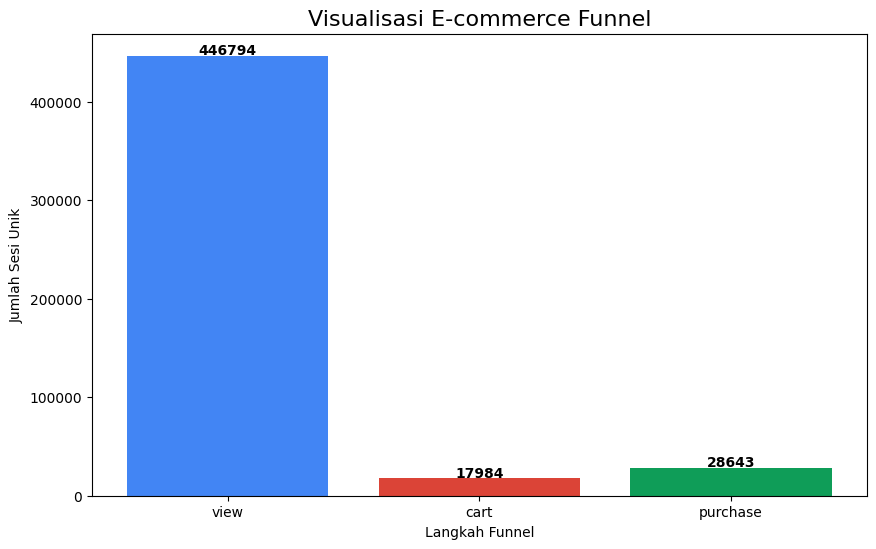

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

# --- 1. MEMUAT DATA ---

FILE_PATH = '/content/drive/MyDrive/2019-Oct.csv'
ROW_LIMIT = 2000000

def load_data(path, limit):
    """Memuat data dari CSV dengan batas baris."""
    print(f"Mulai memuat data (limit {limit} baris)...")
    try:
        df = pd.read_csv(path, nrows=limit)
        print("Data berhasil dimuat.")
        return df
    except FileNotFoundError:
        print(f"ERROR: File not found at {path}")
        print("Pastikan file CSV sudah di-upload ke Google Colab.")
        return None

# --- 2. ANALISIS FUNNEL ---
def analyze_funnel(df):
    """Menganalisis funnel dan menghitung konversi."""
    if df is None:
        return None, None

    print("Menganalisis funnel...")
    # Menghitung sesi unik untuk setiap langkah
    view_sessions = df[df['event_type'] == 'view']['user_session'].nunique()
    cart_sessions = df[df['event_type'] == 'cart']['user_session'].nunique()
    purchase_sessions = df[df['event_type'] == 'purchase']['user_session'].nunique()

    # Menyimpan data untuk visualisasi
    funnel_data = {
        'view': view_sessions,
        'cart': cart_sessions,
        'purchase': purchase_sessions
    }

    # Menghitung konversi
    view_to_cart_rate = (cart_sessions / view_sessions) * 100
    cart_to_purchase_rate = (purchase_sessions / cart_sessions) * 100

    print("\n--- Hasil Analisis Funnel ---")
    print(f"Total Sesi 'View': \t{view_sessions}")
    print(f"Total Sesi 'Cart': \t{cart_sessions}")
    print(f"Total Sesi 'Purchase': \t{purchase_sessions}")

    print("\n--- Tingkat Konversi ---")
    print(f"Konversi View -> Cart: \t\t{view_to_cart_rate:.2f}%")
    print(f"Konversi Cart -> Purchase: \t{cart_to_purchase_rate:.2f}%")

    return funnel_data, cart_to_purchase_rate

# --- 3. VISUALISASI ---
def plot_funnel(funnel_data):
    """Membuat visualisasi bar chart sederhana untuk funnel."""
    if funnel_data is None:
        return

    print("Membuat visualisasi...")
    steps = list(funnel_data.keys())
    values = list(funnel_data.values())

    plt.figure(figsize=(10, 6))  # Atur ukuran gambar
    plt.bar(steps, values, color=['#4285F4', '#DB4437', '#0F9D58'])

    plt.title('Visualisasi E-commerce Funnel', fontsize=16)
    plt.ylabel('Jumlah Sesi Unik')
    plt.xlabel('Langkah Funnel')

    # Tambahkan label angka di atas bar
    for i, v in enumerate(values):
        plt.text(i, v + 1000, str(v), ha='center', fontweight='bold')

    plt.show()



# --- FUNGSI UTAMA ---
def main():
    df = load_data(FILE_PATH, ROW_LIMIT)
    funnel_data, cart_to_purchase_rate = analyze_funnel(df)
    plot_funnel(funnel_data)

    # Menambahkan insight otomatis berdasarkan data
    if cart_to_purchase_rate is not None and cart_to_purchase_rate < 50:
        print("\n--- Insight Bisnis ---")
        print(f"INSIGHT: Tingkat 'Cart -> Purchase' ({cart_to_purchase_rate:.2f}%) rendah.")
        print("REKOMENDASI: Sederhanakan proses checkout atau periksa biaya pengiriman.")

# Menjalankan program utama
if __name__ == "__main__":
    main()